Carregamento do conjunto de dados - MNIST

In [1]:
from keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

Using TensorFlow backend.


Visualização de cinco exemplos do conjunto de dados de treinamento

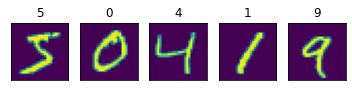

In [2]:
import matplotlib.pyplot as plt

for i, (img, y) in enumerate(zip(X_train[:5].reshape(5, 28, 28), y_train[:5])):
      plt.subplot(151 + i)
      plt.imshow(img)
      plt.xticks([])
      plt.yticks([])
      plt.title(y)

In [3]:
print("X_train ", str(X_train.shape))
print("y_train ", str(y_train.shape))
print("X_test ", str(X_test.shape))
print("y_test", str(y_test.shape))

X_train  (60000, 28, 28)
y_train  (60000,)
X_test  (10000, 28, 28)
y_test (10000,)


Criando um conjunto de validação

In [4]:
X_val = X_train[50000:, :, :]
X_train = X_train[:50000, :, :]

y_val = y_train[50000:]
y_train = y_train[:50000]

Formato do X_train, y_train, X_test e y_test

In [5]:
print("X_train ", str(X_train.shape))
print("y_train ", str(y_train.shape))
print("X_val ", str(X_val.shape))
print("y_val ", str(y_val.shape))
print("X_test ", str(X_test.shape))
print("y_test", str(y_test.shape))

X_train  (50000, 28, 28)
y_train  (50000,)
X_val  (10000, 28, 28)
y_val  (10000,)
X_test  (10000, 28, 28)
y_test (10000,)


Reshape dos dados de Treinamento

In [6]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))


print("X_train ", str(X_train.shape))
print("X_val ", str(X_val.shape))
print("X_test ", str(X_test.shape))

X_train  (50000, 28, 28, 1)
X_val  (10000, 28, 28, 1)
X_test  (10000, 28, 28, 1)


Escalando o conjunto de treinamento [0, 1]

In [7]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

print("X_train ", str((X_train.min(), X_train.max())))
print("X_val ", str((X_val.min(), X_val.max())))
print("X_test ", str((X_test.min(), X_test.max())))

X_train  (0.0, 1.0)
X_val  (0.0, 1.0)
X_test  (0.0, 1.0)


Utilizando o OneHot nos dados de rótulos.

In [8]:
from keras.utils import to_categorical

num_classes = 10
y_train= to_categorical(y_train,num_classes)
y_val = to_categorical(y_val,num_classes)
y_test = to_categorical(y_test,num_classes)

print("y_train ", str(y_train.shape))
print("y_val ", str(y_val.shape))
print("y_test ", str(y_test.shape))

y_train  (50000, 10)
y_val  (10000, 10)
y_test  (10000, 10)


Rede Convolucional 

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))    
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Visualização da rede

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

Treinamento

In [11]:
results = model.fit(X_train, y_train, 
                    epochs=15, batch_size=64,
                    validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 70s 1ms/step - loss: 0.1928 - accuracy: 0.9395 - val_loss: 0.0831 - val_accuracy: 0.9742
Epoch 2/15
50000/50000 [==============================] - 69s 1ms/step - loss: 0.0521 - accuracy: 0.9843 - val_loss: 0.0419 - val_accuracy: 0.9881
Epoch 3/15
50000/50000 [==============================] - 69s 1ms/step - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.0335 - val_accuracy: 0.9900
Epoch 4/15
50000/50000 [==============================] - 69s 1ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0411 - val_accuracy: 0.9877
Epoch 5/15
50000/50000 [==============================] - 69s 1ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0321 - val_accuracy: 0.9913
Epoch 6/15
50000/50000 [==============================] - 69s 1ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0369 - val_accuracy: 0.9893
Epoch 7/15
50000/50000 [==============================] - 69s 1ms/st

Visualização do desempenho

In [12]:
accuracy = results.history['accuracy']
loss = results.history['loss']

val_accuracy = results.history['val_accuracy']
val_loss = results.history['val_loss']

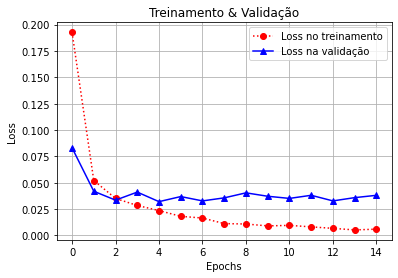

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(loss, 'go:', color="red", label="Loss no treinamento")
plt.plot(val_loss,'r^-',  color="blue", label="Loss na validação")
plt.title("Treinamento & Validação")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.grid(True)
plt.legend()
plt.show()
plt.savefig("loss.png", format="png")

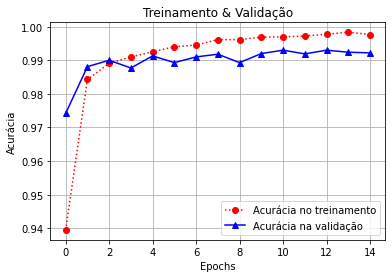

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(accuracy, 'go:', color="red", label="Acurácia no treinamento")
plt.plot(val_accuracy,'r^-',  color="blue", label="Acurácia na validação")
plt.title("Treinamento & Validação")
plt.ylabel("Acurácia")
plt.xlabel("Epochs")
plt.grid(True)
plt.legend()
plt.show()
plt.savefig("acuracia.png", format="png")

Acurácia no conjunto de testes

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=64)
print('Acurácia: %.4f' % (test_accuracy))

10000/10000 [==============================] - 3s 345us/step
Acurácia: 0.9919


Previsões

In [18]:
import numpy as np
previsoes = model.predict(X_test)
prev_5 = np.argmax(previsoes, axis=1)[:5]

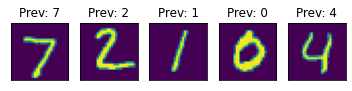

In [19]:
for i, (prev) in enumerate(prev_5):
      plt.subplot(151 + i)
      plt.imshow(X_test[i].reshape(28, 28))
      plt.xticks([])
      plt.yticks([])
      plt.title("Prev: " + str(prev))
